# Submitted by: Snehal Devendra Kagwade
Task-1: To Predict the percentage of an student based on the no. of study hours

In [1]:
# Importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
#First 10 rows of dataset
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Last 5 rows of dataset
df.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plotting and Distribution

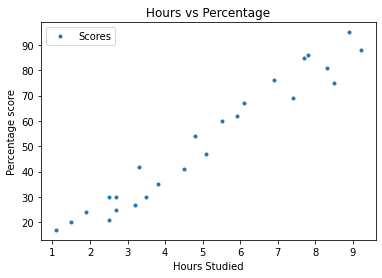

In [7]:
# Plotting the distribution of score
df.plot(x='Hours',y='Scores',style='.')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

# Preperation of the given Data

In [8]:
#Dividing the Data into attributes(input) and labels(output)
x=df.iloc[:,:-1].values
y=df.iloc[:, 1].values

In [9]:
#Splitting this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

# To train the Algorithm

In [10]:
#Splitting of Data into training and testing sets is done, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

print("Training Completed.")

Training Completed.


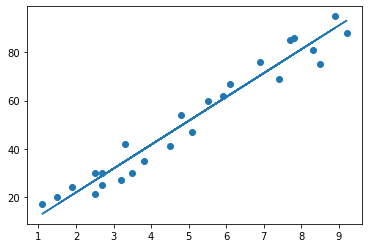

In [11]:
#Plotting the regression line
line = regression.coef_*x+regression.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

In [12]:
#some predictions after the algorithm is trained
print(x_test) #Testing data - in hours
y_pred = regression.predict(x_test)  #predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:

#Comparing actual vs predicted
df1 = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting score if a student studies for 9.25 hrs/day

In [14]:
#Predicting  the percentage of the student who studied for 9.25 hrs/day
hours = np.array(9.25)
hours = hours.reshape(-1, 1)
pred = regression.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score ={}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score =93.69173248737539


# Evaluting the Model

In [15]:
#The final step is to evaluate the performance of the algorithm
from sklearn  import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982


# Conclusion
From the above we can see that the predicting score of the model is93.69 with mean absolute error 4.18 which is pretty much accurate